In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx
/kaggle/input/flight-fare-prediction-mh/Sample_submission.xlsx
/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx


In [5]:
import pandas as pd 
pd.set_option('display.max_columns',60)

import numpy as np 
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [11]:
#!pip install xlrd
#!pip install openpyxl

In [13]:
#Reading training and testing dataset
train = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')
test =  pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx')


In [15]:
#Checking the shape of the training and testing dataset
print('Size of training set is {}'.format(train.shape))
print('Size of testing set is  {}'.format(test.shape))

Size of training set is (10683, 11)
Size of testing set is  (2671, 10)


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We can see that there is one null value in the training set and zero null value in the testing set.

**Solution** : Either fill the null value with the mean/median or delete the datapoint.

In [19]:
train = train.dropna()
print('Size of training set is {}'.format(train.shape))


Size of training set is (10682, 11)


# Data Cleaning 


**Converting Date-time columns into pandas datetime format**

In [25]:
#for training set 
train['Date_of_Journey']  =  pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y')
train['Journey_day']      =  train['Date_of_Journey'].dt.day
train['Dep_day']          =  train['Date_of_Journey'].dt.dayofweek
train['Dep_month']        =  train['Date_of_Journey'].dt.month


#for testing set 
test['Date_of_Journey']  =  pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y')
test['Journey_day']      =  test['Date_of_Journey'].dt.day
test['Dep_day']          =  test['Date_of_Journey'].dt.dayofweek
test['Dep_month']        =  test['Date_of_Journey'].dt.month

In [30]:
#sns.countplot(train['Journey_day'])

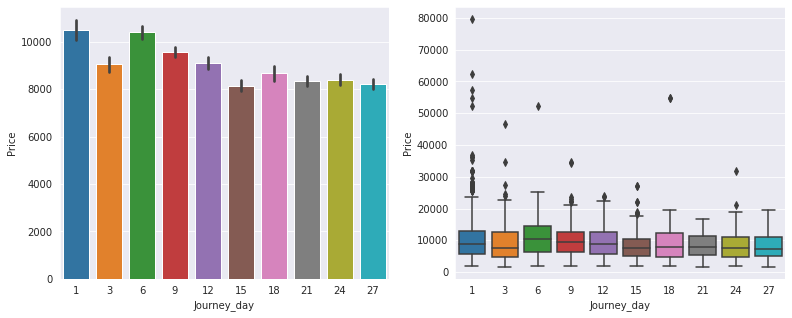

In [31]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Journey_day'],train['Price'], ax =axes[0])
sns.boxplot(train['Journey_day'],train['Price'], ax =axes[1])
plt.show()

**We can observe that first day of the month the price is high,if you look at the box plots median is similar to other days also there are some outliers.
Possible due to some Flights runing on selected days**

In [37]:
#for training set
train['Dep_month']    =  train['Dep_month'].replace({1:'Jan', 2:'Feb',    3:'Mar',  4:'April',   5:'May', 6:'June',
                                                 7:'July',8:'August', 9:'Sept', 10:'Oct',   11:'Nov', 12:'Dec'})

#for testing set
test['Dep_month']    =  test['Dep_month'].replace({1:'Jan', 2:'Feb',    3:'Mar',  4:'April',   5:'May', 6:'June',
                                                 7:'July',8:'August', 9:'Sept', 10:'Oct',   11:'Nov', 12:'Dec'})

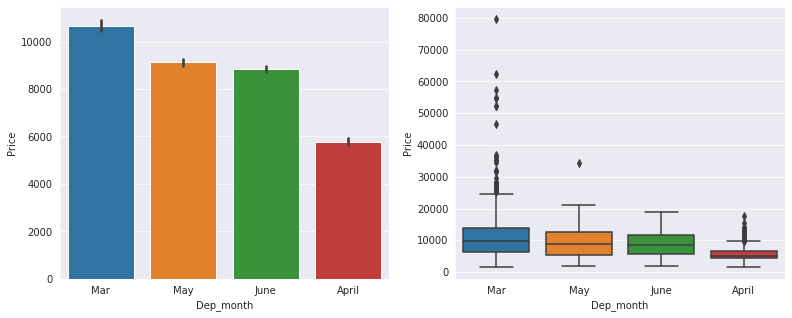

In [38]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Dep_month'],train['Price'], ax =axes[0])
sns.boxplot(train['Dep_month'],train['Price'], ax =axes[1])
plt.show()

**We can see that during march price is higher compared to other months.Again if we look into the boxplot this may be due to some of the flights available in the month of march**

In [39]:
#fro training set
train['Dep_day']      =  train['Dep_day'].replace({0:'Mon',1:'Tue',2:'Wed',
                                            3:'Thur',4:'Fri',5:'Sat',6:'Sun'})
#for testing set

test['Dep_day']      =  test['Dep_day'].replace({0:'Mon',1:'Tue',2:'Wed',
                                            3:'Thur',4:'Fri',5:'Sat',6:'Sun'})

<AxesSubplot:xlabel='Dep_day', ylabel='Price'>

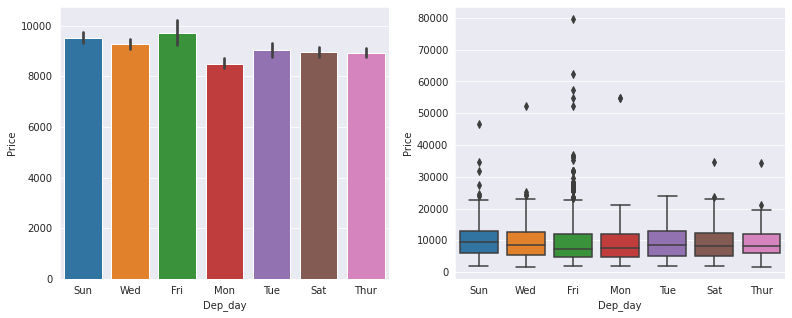

In [40]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Dep_day'],train['Price'], ax =axes[0])
sns.boxplot(train['Dep_day'],train['Price'], ax =axes[1])

**A general assumption,I have is weekends the price should be higher but the data shows not much significant difference.One reason would be we have only datapoints of only 3 months**

In [41]:

#for training set 
train['Journey_week']=train['Journey_day'].replace({1 :'first_week',
                             3 :'first_week',
                             6 :'first_week',
                             9 :'second_week',
                            12 :'second_week',
                            15 :'third_week',
                            18 :'third_week',
                            21 :'third_week',
                            24 :'fourth_week',
                            27 :'fourth_week'})
#for testing set
test['Journey_week']=test['Journey_day'].replace({1 :'first_week',
                             3 :'first_week',
                             6 :'first_week',
                             9 :'second_week',
                            12 :'second_week',
                            15 :'third_week',
                            18 :'third_week',
                            21 :'third_week',
                            24 :'fourth_week',
                            27 :'fourth_week'})



**This feature engineering is optional,you can keep the days as it is**

In [42]:
#now we can drop the date of journey column
train.drop(['Date_of_Journey'],axis=1,inplace=True)
#now we can drop the date of journey column for 
test.drop(['Date_of_Journey'],axis=1,inplace=True)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Dep_day,Dep_month,Journey_week
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,Thur,June,first_week
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,Sun,May,second_week
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,Tue,May,third_week


<AxesSubplot:xlabel='Journey_week', ylabel='Price'>

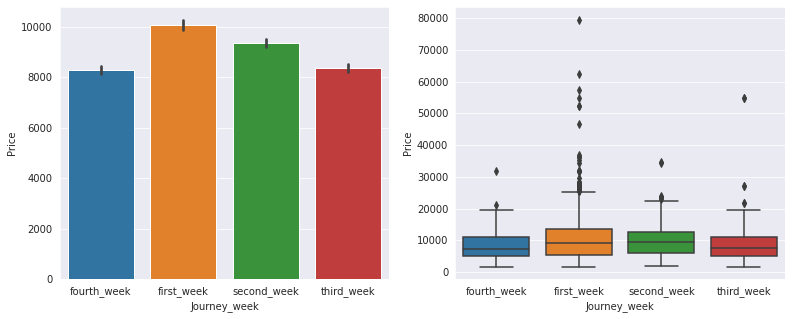

In [43]:

f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Journey_week'],train['Price'], ax =axes[0])
sns.boxplot(train['Journey_week'],train['Price'], ax =axes[1])

**Not much of a significant difference here**

In [44]:
#similarly converting the departure time column into a timestamp in training dataset
train['Dep_Time']         =  pd.to_datetime(train['Dep_Time']).dt.time
train['Dep_hr']           =  train['Dep_Time'].apply(lambda x:x.hour)

#similarly converting the departure time column into a timestamp in testing dataset
test['Dep_Time']         =  pd.to_datetime(test['Dep_Time']).dt.time
test['Dep_hr']           =  test['Dep_Time'].apply(lambda x:x.hour)


In [46]:
def pod(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

**Dividing the hours according to the parts of day,again it is my assumption that price varies according to various time**

In [47]:
#for training set
train['Dep_Part_of_day']=train['Dep_hr'].apply(pod)
train.drop(['Dep_Time','Dep_hr'],axis=1,inplace=True)

#for testing set
test['Dep_Part_of_day']=test['Dep_hr'].apply(pod)
test.drop(['Dep_Time','Dep_hr'],axis=1,inplace=True)

<AxesSubplot:xlabel='Dep_Part_of_day', ylabel='Price'>

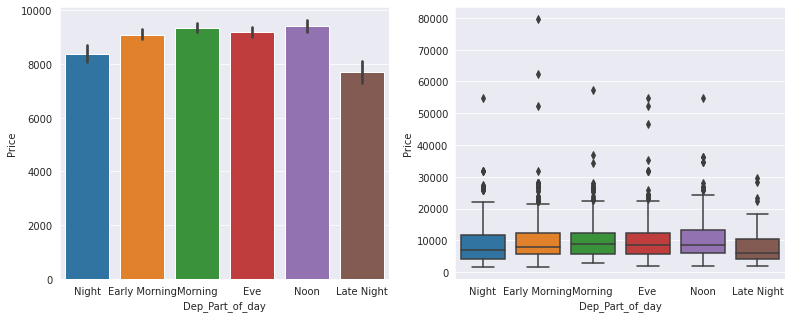

In [48]:

f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Dep_Part_of_day'],train['Price'], ax =axes[0])
sns.boxplot(train['Dep_Part_of_day'],train['Price'], ax =axes[1])

**The data we have shows that there is not much of a significant difference between various parts of day(maybe because we have datapoints of 3 months)**

In [49]:
train['Arrival_Time']         =  pd.to_datetime(train['Arrival_Time']).dt.time
train['Arrival_hr']           = train['Arrival_Time'].apply(lambda x :x.hour)

test['Arrival_Time']         =  pd.to_datetime(test['Arrival_Time']).dt.time
test['Arrival_hr']           = test['Arrival_Time'].apply(lambda x :x.hour)

In [50]:
def pod(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
    


In [51]:
train['Arrival_Part_of_day']=train['Arrival_hr'].apply(pod)
train.drop(['Arrival_Time','Arrival_hr'],axis=1,inplace=True)

test['Arrival_Part_of_day']=test['Arrival_hr'].apply(pod)
test.drop(['Arrival_Time','Arrival_hr'],axis=1,inplace=True)

<AxesSubplot:xlabel='Arrival_Part_of_day', ylabel='Price'>

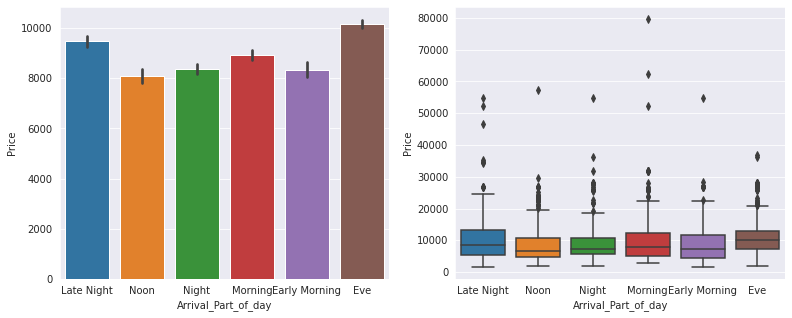

In [52]:

f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Arrival_Part_of_day'],train['Price'], ax =axes[0])
sns.boxplot(train['Arrival_Part_of_day'],train['Price'], ax =axes[1])

**Same is for arrival times,not much difference**

In [53]:
#converting the duration column into total mins 
train['Duration_mins']  =  train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
train['Duration']       =  train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#converting the duration column into total mins 
test['Duration_mins']  =  test['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration']       =  test['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)




In [54]:
train.drop('Duration',axis=1,inplace=True)
test.drop('Duration',axis=1,inplace=True)

<AxesSubplot:xlabel='Duration_mins', ylabel='Price'>

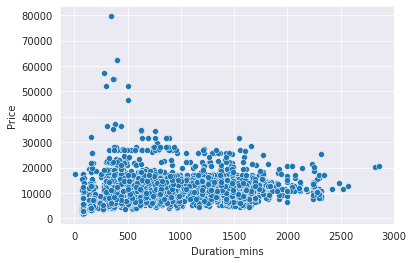

In [55]:
sns.scatterplot(train['Duration_mins'],train['Price'])

**Genereal assumption is that longer flight duration cost more,can't infer too much from the scatterplot above**

In [56]:
train.groupby(['Additional_Info'])['Price'].agg({'mean','median','count'})

,count,median,mean
Additional_Info,,,
1 Long layover,19,25735,22109.631579
1 Short layover,1,26743,26743.000000
2 Long layover,1,26480,26480.000000
Business class,4,59818,56811.250000
Change airports,7,15119,16800.714286
In-flight meal not included,1982,10262,9471.834511
No Info,3,8064,8044.666667
No check-in baggage included,320,3841,3645.156250
No info,8344,8016,9141.519295


In [57]:
#since most of the data in this column is non-info,I will consider this as null values and drop the column
train.drop('Additional_Info',axis=1,inplace=True)

test.drop('Additional_Info',axis=1,inplace=True)

# Feature engineering

In [60]:
#encoding by using mean of each group 
train['Mean_Route'] = train['Route'].replace(dict(train.groupby(['Route'])['Price'].mean()))

test['Mean_Route']  = test['Route'].replace(dict(train.groupby(['Route'])['Price'].mean()))

**Ok,now one thing I know is the price varies according to route,depending on the number of stops(also depending on where your flight has an hault),instead of label encoding,I have gone for mean encoding**

**for ex : *Mum-Hyd-Delhi* price varies  for *Mum-Calcutta-Delhi***, so instead of label encoding,I have done mean encoding for better understanding of the groups

<AxesSubplot:xlabel='Mean_Route', ylabel='Price'>

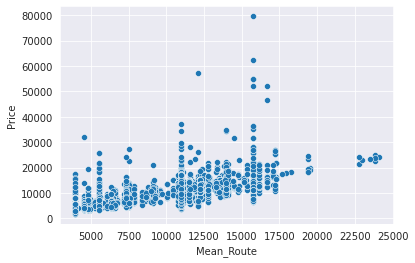

In [61]:
sns.scatterplot(train['Mean_Route'],train['Price'])

**AS you can see above**

In [63]:
#changing the total stops to numerical values
train['Total_Stops']=train['Total_Stops'].replace({'non-stop': 0,
                                                   '1 stop'  : 1,
                                                   '2 stops' : 2,
                                                   '3 stops' : 3,
                                                   '4 stops' : 4})

#changing the total stops to numerical values
test['Total_Stops']=test['Total_Stops'].replace({'non-stop': 0,
                                                   '1 stop'  : 1,
                                                   '2 stops' : 2,
                                                   '3 stops' : 3,
                                                   '4 stops' : 4})


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

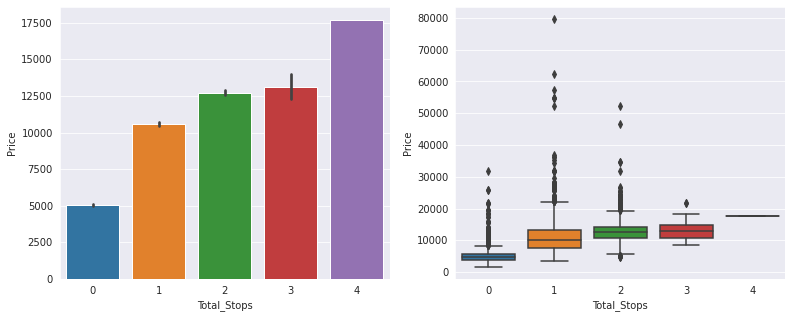

In [64]:

f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Total_Stops'],train['Price'], ax =axes[0])
sns.boxplot(train['Total_Stops'],train['Price'], ax =axes[1])

**As you can see above stops play an important factor in deciding the price of the flights,
more stops leads to an increas in the price**

In [65]:
#Renaming and creating a new feature combining the source and destination
train['Source']        =  train['Source'].replace({'Banglore' :'B',
                                                   'Kolkata'  :'K',
                                                   'Delhi'    :'D',
                                                   'Mumbai'   :'M',
                                                   'Chennai'  :'C'})
train['Destination']   =  train['Destination'].replace({'Cochin'    :'Co',
                                                        'Kolkata'   :'Ko',
                                                        'Delhi'     :'Del',
                                                        'New Delhi' :'Nd',
                                                        'Hyderabad' :'H',
                                                        'Banglore'  :'Ba'})
#creating a new feature combining the source and destination
train['Flight_name']   =  train['Source'] +  '-'  +  train['Destination']



In [66]:
#for testing set
#Renaming and creating a new feature combining the source and destination
test['Source']        =  test['Source'].replace({'Banglore' :'B',
                                                   'Kolkata'  :'K',
                                                   'Delhi'    :'D',
                                                   'Mumbai'   :'M',
                                                   'Chennai'  :'C'})
test['Destination']   =  test['Destination'].replace({'Cochin'    :'Co',
                                                        'Kolkata'   :'Ko',
                                                        'Delhi'     :'Del',
                                                        'New Delhi' :'Nd',
                                                        'Hyderabad' :'H',
                                                        'Banglore'  :'Ba'})
test['Flight_name']   =  test['Source'] +  '-'  +  test['Destination']

In [67]:
#combining total stops and flight name 
train['Flight_Stops']= train['Flight_name'] + train['Total_Stops'].astype(str)

test['Flight_Stops']= test['Flight_name'] + test['Total_Stops'].astype(str)

#train.drop(['Flight_name'],axis=1,inplace=True)

In [ ]:
#train.drop('Route',axis=1,inplace=True)

In [68]:
#renaming the airline column for simplicity and to create new variables
train['Airline']=train['Airline'].replace({'Jet Airways':'JA','Air Asia' : 'AA','GoAir':'GA','Multiple carriers Premium economy'  :'MCEc',
                          'IndiGo'     :'IG','Air India':'AI' ,'Multiple carriers':'MC','SpiceJet':'SJ','Vistara':'V',
                         'Jet Airways Business':'JAB','Vistara Premium economy':'VEc','Trujet':'TJ'})

test['Airline']=test['Airline'].replace({'Jet Airways':'JA','Air Asia' : 'AA','GoAir':'GA','Multiple carriers Premium economy'  :'MCEc',
                          'IndiGo'     :'IG','Air India':'AI' ,'Multiple carriers':'MC','SpiceJet':'SJ','Vistara':'V',
                         'Jet Airways Business':'JAB','Vistara Premium economy':'VEc','Trujet':'TJ'})

In [71]:
#creating a new variable combining airline,flightname,and total stops 
train['Flight_Stops']= train['Airline'] + '/' + train['Flight_name'] + train['Total_Stops'].astype(str)

test['Flight_Stops']= test['Airline'] + '/' + test['Flight_name'] + test['Total_Stops'].astype(str)


In [72]:
#again using mean encoding instead of label encoding 
train['Mean_Flight_Stops']=train['Flight_Stops'].replace(dict(train.groupby(['Flight_Stops'])['Price'].mean()))

test['Mean_Flight_Stops']=test['Flight_Stops'].replace(dict(train.groupby(['Flight_Stops'])['Price'].mean()))

**So, what i have done here is combining airline,flightname and total stops,this was done because I know one thing is depending on the airline ,the no.of stops and location price varies.I hope it gets borader perspective of the data**

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Flight_Stops'] = le.fit_transform(train['Flight_Stops'])


test['Flight_Stops'] = le.fit_transform(test['Flight_Stops'])

In [75]:
#sns.scatterplot(train['Flight_Stops'],train['Price'])

In [76]:
train.drop('Route',axis=1,inplace=True)

# Data-Preprocessing

In [77]:
airline=pd.get_dummies(train['Airline'],drop_first=True)
train.drop(['Airline'],axis=1,inplace=True)
airline.head()

,AI,GA,IG,JA,JAB,MC,MCEc,SJ,TJ,V,VEc
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [78]:
source=pd.get_dummies(train['Source'],drop_first=True)
train.drop(['Source'],axis=1,inplace=True)
source.head()


,C,D,K,M
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [79]:
destination=pd.get_dummies(train['Destination'],drop_first=True)
train.drop(['Destination'],axis=1,inplace=True)
destination.head()

,Co,Del,H,Ko,Nd
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [80]:
dep_day=pd.get_dummies(train['Dep_day'],drop_first=True)
train.drop(['Dep_day'],axis=1,inplace=True)

dep_day.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0


In [81]:
dep_month=pd.get_dummies(train['Dep_month'],drop_first=True)
train.drop(['Dep_month'],axis=1,inplace=True)


dep_month.head()

,June,Mar,May
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [82]:
jour_week=pd.get_dummies(train['Journey_week'],drop_first=True)
train.drop(['Journey_week'],axis=1,inplace=True)


jour_week.head()

,fourth_week,second_week,third_week
0,1,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [83]:
dep_pod=pd.get_dummies(train['Dep_Part_of_day'],drop_first=True)
train.drop(['Dep_Part_of_day'],axis=1,inplace=True)


dep_pod.head()

,Eve,Late Night,Morning,Night,Noon
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [84]:
arr_pod=pd.get_dummies(train['Arrival_Part_of_day'],drop_first=True)
train.drop(['Arrival_Part_of_day'],axis=1,inplace=True)
arr_pod.columns = ['eve_arr','late_night_arr','morn_arr','night_arr','noon_arr']


arr_pod.head()

,eve_arr,late_night_arr,morn_arr,night_arr,noon_arr
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Flight_name'] = le.fit_transform(train['Flight_name'])

In [86]:
#combining all the pre-procssed data
final_train=pd.concat([train,airline,source,destination,dep_day,dep_month,
                      jour_week,dep_pod,arr_pod],axis=1)
final_train = final_train.drop('Flight_Stops',axis=1)


In [87]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
final_train['Journey_day'] = std.fit_transform(final_train[['Journey_day']])
final_train['Duration_mins'] = std.fit_transform(final_train[['Duration_mins']])

#final_train.drop(['Journey_day','Dep_hr','Arrival_hr','Duration_mins'],axis=1,inplace=True)

In [89]:
final_train.head(4)

,Total_Stops,Price,Journey_day,Duration_mins,Mean_Route,Flight_name,Mean_Flight_Stops,AI,GA,IG,JA,JAB,MC,MCEc,SJ,TJ,V,VEc,C,D,K,M,Co,Del,H,Ko,Nd,Mon,Sat,Sun,Thur,Tue,Wed,June,Mar,May,fourth_week,second_week,third_week,Eve,Late Night,Morning,Night,Noon,eve_arr,late_night_arr,morn_arr,night_arr,noon_arr
0,0,3897,1.237288,-0.931498,5561.114691,1,7121.948718,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,2,7662,-1.475307,-0.389953,7369.166667,4,12261.312500,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,13882,-0.531796,0.978679,13277.195122,3,13291.973412,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,1,6218,-0.177979,-0.626263,6279.333333,4,5730.225806,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


# Modelling Part

In [91]:
#dividing the target variable from predictors
X = final_train.drop(['Price'],axis=1)
y = final_train['Price']


In [92]:
# let us look at some of the important features which is useful for predicting the target variable using mutual info
from sklearn.feature_selection import mutual_info_classif
feat_imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)


<AxesSubplot:>

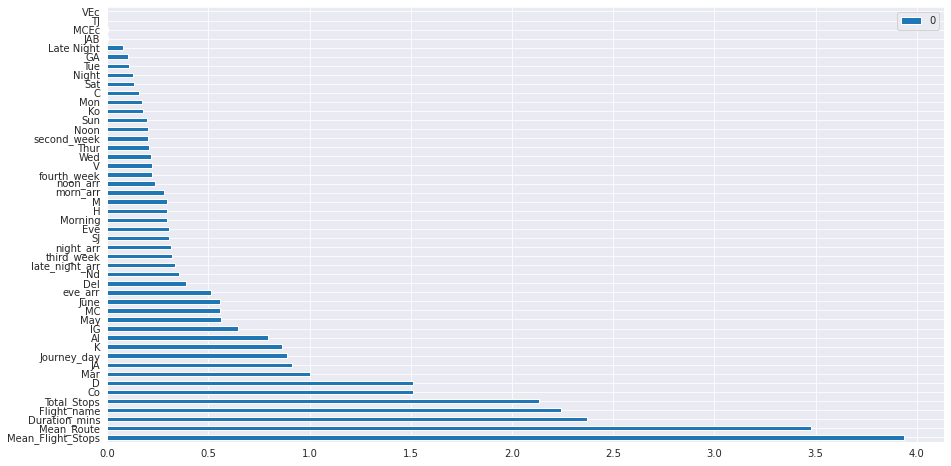

In [93]:
feat_imp.sort_values(by=0,ascending=False).plot(kind='barh',figsize=(15,8))

**According to our newly created feature,Mean_flight_Stops,Mean_Route has be give higher importance according to mutual info classif(feature selection)**

In [94]:
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Ridge,Lasso
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import GradientBoostingRegressor,RandomForestRegressor
from xgboost                 import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold



In [95]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [96]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def model_predict(ml_model):
    print('Model used is     :  {}'.format(ml_model))
    print('\t')
    #Training Info
    model      = ml_model.fit(X_train,y_train)
    train_pred = ml_model.predict(X_train)
    print("Training R2 score :  {}".format(round(model.score(X_train,y_train),2)))
    print('Training MAE      :  {}'.format(round(mean_absolute_error(y_train,train_pred),2)))
    print('Training MSE      :  {}'.format(round(mean_squared_error(y_train,train_pred),2)))
    print('Training RMSE     :  {}'.format(np.sqrt(round(mean_squared_error(y_train,train_pred),2))))
    print('\t')
    
    #Test Info
    predictions = model.predict(X_test)
    r2score     = r2_score(y_test,predictions) 
    print("Test R2 score     :  {}".format(round(r2score,2)))
    print('Test MAE          :  {}'.format(round(mean_absolute_error(y_test,predictions),2)))
    print('Test MSE          :  {}'.format(round(mean_squared_error(y_test,predictions),2)))
    print('Test RMSE         :  {}'.format(np.sqrt(round(mean_squared_error(y_test,predictions),2))))

In [97]:
model_predict(DecisionTreeRegressor())

Model used is     :  DecisionTreeRegressor()
	
Training R2 score :  0.97
Training MAE      :  334.13
Training MSE      :  666401.62
Training RMSE     :  816.334257519553
	
Test R2 score     :  0.77
Test MAE          :  1292.22
Test MSE          :  4991994.29
Test RMSE         :  2234.277129185187


In [98]:
#Since there is a problem of overfitting let us generalize the model
#depth      = list(range(4,30))
#param_grid =  dict(max_depth=depth)
#grid_search       = GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10,n_jobs=-1)
#grid_search.fit(X_train, y_train)

In [99]:
model_predict(DecisionTreeRegressor(max_depth = 12))

Model used is     :  DecisionTreeRegressor(max_depth=12)
	
Training R2 score :  0.92
Training MAE      :  859.42
Training MSE      :  1761151.07
Training RMSE     :  1327.0836710622282
	
Test R2 score     :  0.83
Test MAE          :  1184.07
Test MSE          :  3585819.08
Test RMSE         :  1893.6259081455344


In [100]:
model_predict(RandomForestRegressor())

Model used is     :  RandomForestRegressor()
	
Training R2 score :  0.96
Training MAE      :  566.26
Training MSE      :  945062.9
Training RMSE     :  972.1434564918904
	
Test R2 score     :  0.84
Test MAE          :  1164.32
Test MSE          :  3542893.75
Test RMSE         :  1882.2576205185092


In [101]:
#tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [10, 20, 40], 'min_samples_leaf': [1, 2, 4]}
#random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
#random_regressor.fit(X_train, y_train)

In [102]:
#random_regressor.best_params_

In [103]:
model_predict(RandomForestRegressor(n_estimators=400,min_samples_split=10,min_samples_leaf=2))

Model used is     :  RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=400)
	
Training R2 score :  0.91
Training MAE      :  813.46
Training MSE      :  1869244.46
Training RMSE     :  1367.2031524246863
	
Test R2 score     :  0.85
Test MAE          :  1118.18
Test MSE          :  3173101.84
Test RMSE         :  1781.3202519479757


In [104]:
model_predict(LinearRegression())

Model used is     :  LinearRegression()
	
Training R2 score :  0.71
Training MAE      :  1735.76
Training MSE      :  6170000.49
Training RMSE     :  2483.9485683081284
	
Test R2 score     :  0.71
Test MAE          :  1796.09
Test MSE          :  6286528.36
Test RMSE         :  2507.2950285118027


In [105]:
model_predict(GradientBoostingRegressor())

Model used is     :  GradientBoostingRegressor()
	
Training R2 score :  0.82
Training MAE      :  1349.15
Training MSE      :  3883587.93
Training RMSE     :  1970.6820976504557
	
Test R2 score     :  0.83
Test MAE          :  1376.89
Test MSE          :  3763333.36
Test RMSE         :  1939.9312771332907


In [106]:
model_predict(XGBRegressor())

Model used is     :  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
	
Training R2 score :  0.94
Training MAE      :  805.57
Training MSE      :  1337679.25
Training RMSE     :  1156.58084455865
	
Test R2 score     :  0.86
Test MAE          :  1139.1
Test MSE          :  3033321.86
Test RMSE         :  1741.6434365276953


In [107]:
model_predict(XGBRegressor(reg_lambda=1.0,n_estimators=500,max_depth=5,learning_rate=0.05))

Model used is     :  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=1.0,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
	
Training R2 score :  0.91
Training MAE      :  996.46
Training MSE      :  1990977.14
Training RMSE     :  1411.019893552178
	
Test R2 score     :  0.86
Test MAE          :  1160.32
Test MSE          :  3073417.17
Test RMSE         :  1753.1164165565274


**I will prefer Gradient boosting because it is giving me a generalized model,Also the evaluation metric i'm using is RMSE since we have a lot of outliers**

If you have reached till here, So i hope you liked my Approach,well it is slightly different from others.**I highly recommend you guys to give me a Honest opinion.**

I recommend people to point to any mistakes I made 

Also,Don't forget to upvote if you like it!.


If you have any doubt reagrding any part of the notebook, feel free to comment your doubt in the comment box.

Thank you!!